In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


### Drivers for loan defaults. just importing csv and returning a pd df

In [2]:
# creating a path to the CSV file
csv_file_path = 'loan_default.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [3]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.EmploymentType.info()

<class 'pandas.core.series.Series'>
RangeIndex: 255347 entries, 0 to 255346
Series name: EmploymentType
Non-Null Count   Dtype 
--------------   ----- 
255347 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [7]:
new_df = df

In [8]:
# Create a dictionary mapping old column names to new column names
# Replace the keys with your existing column names and the values with the new names
column_mapping = {
    'LoanID': 'loan_id',
    'Age': 'age',
    'Income': 'income',
    'LoanAmount': 'loan_amount',
    'CreditScore': 'credit_score',
    'MonthsEmployed': 'months_employed',
    'NumCreditLines': 'no_credit_lines',
    'InterestRate': 'interest_rate',
    'LoanTerm': 'loan_term',
    'DTIRatio': 'debt_income_ratio',
    'Education': 'education',
    'EmploymentType': 'employment_type',
    'MaritalStatus' :'marital_status',
    'HasMortgage' :'mortgage',
    'HasDependents' :'dependents',
    'LoanPurpose' :'loan_purpose',
    'HasCoSigner' :'cosigner',
    'Default' : 'defaulted'
}

# Rename columns using the mapping
new_df.rename(columns=column_mapping, inplace=True)


In [9]:
new_df

,loan_id,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


### noticed that there was 29653 people who have defaulted. Why?


In [10]:
count_ones = (new_df['defaulted'] == 1).sum()
count_ones

29653

In [11]:
# just changing yes and no's to ones and zero's
new_df['mortgage'] = new_df['mortgage'].replace({'Yes': 1, 'No': 0})


In [12]:
new_df

,loan_id,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,Yes,Other,No,0


In [13]:
new_df['dependents'] = new_df['dependents'].replace({'Yes': 1, 'No': 0})

In [14]:
new_df

,loan_id,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,1,Other,No,0


In [15]:
new_df['cosigner'] = new_df['cosigner'].replace({'Yes': 1, 'No': 0})

In [16]:
new_df

,loan_id,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,0,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,0,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,1,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,1,Other,0,0


In [17]:
new_df

,loan_id,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,0,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,0,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,1,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,1,Other,0,0


In [18]:
# Set 'loan_id' as the index
new_df.set_index('loan_id', inplace=True)


In [19]:
def cred_rating(row):
    if 300 <= row['credit_score'] <=  575:
        return 'low'
    elif 576 <= row['credit_score'] <= 700:
        return 'average'
    elif 701 <= row['credit_score'] <= 850:
        return 'high'

new_df['credit_rating'] = new_df.apply(cred_rating, axis=1)

In [20]:
new_df.credit_rating.value_counts()

low        128383
high        68946
average     58018
Name: credit_rating, dtype: int64

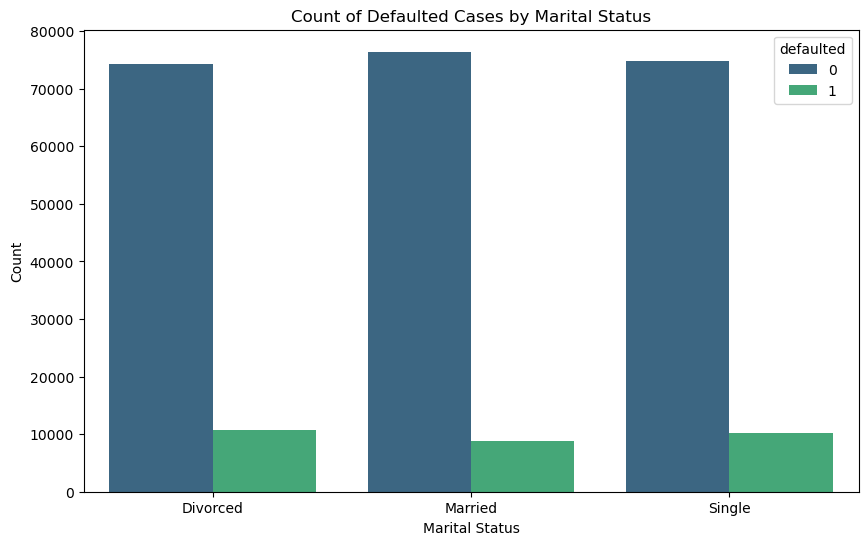

In [21]:
# Create a count plot for education and defaulted
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='defaulted', data=new_df, palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Defaulted Cases by Marital Status')
plt.show()

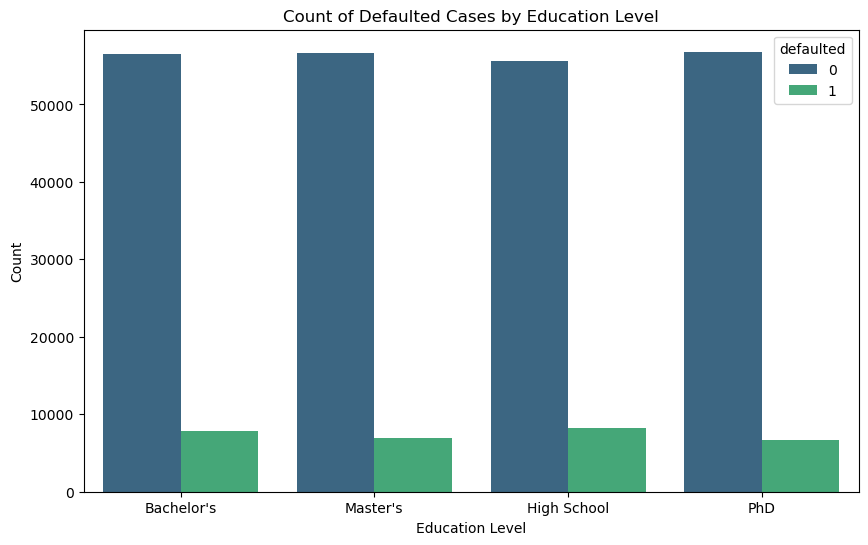

In [22]:
# Create a count plot for education and defaulted
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='defaulted', data=new_df, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Defaulted Cases by Education Level')
plt.show()

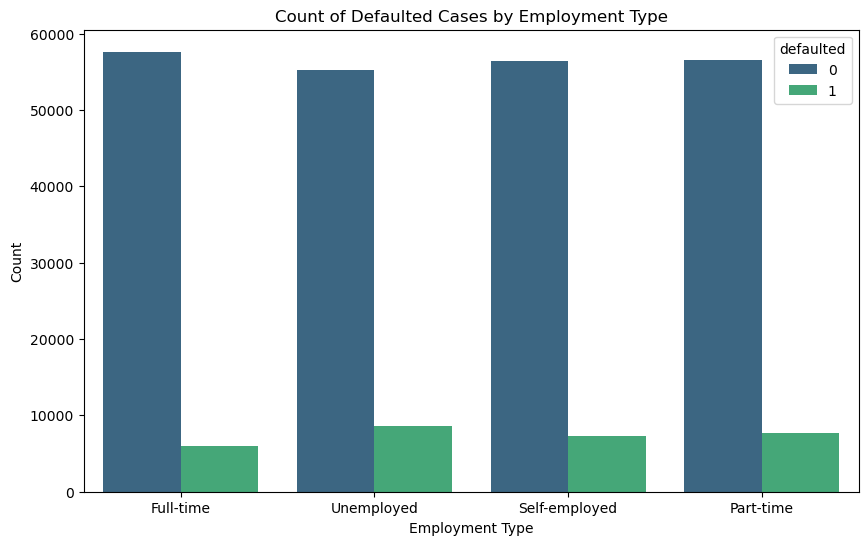

In [23]:
# Create a count plot for education and defaulted
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', hue='defaulted', data=new_df, palette='viridis')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Count of Defaulted Cases by Employment Type')
plt.show()

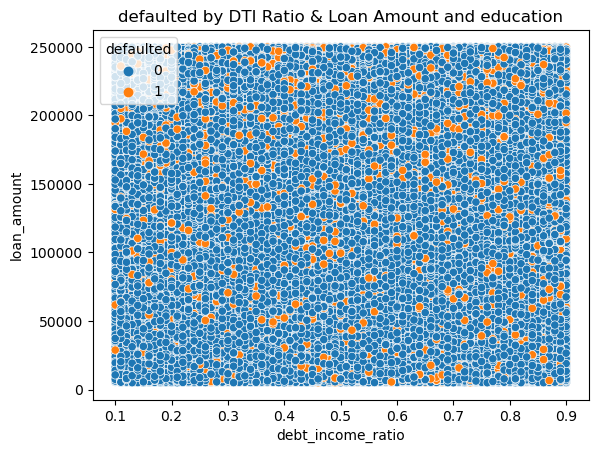

In [24]:
# Scatterplot but it is a mess and not easy to look at
sns.scatterplot(x='debt_income_ratio', y='loan_amount', data=df, hue='defaulted')

plt.title('defaulted by DTI Ratio & Loan Amount and education')
plt.show()


In [48]:
# Split data
def split_data(df):
    '''
    split continuouse data into train, validate, test;target variable being qualit

    returns train, validate, test
    '''

    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=123,
                                   stratify = df['defaulted'])
    train, validate = train_test_split(train_val,
                                   train_size=0.75,
                                   random_state=123,
                                   stratify=train_val['defaulted'])
    
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    

    return train, validate, test

In [49]:
train, validate, test = split_data(new_df)
train

Train: 0.5999953005126357
Validate: 0.20000234974368214
Test: 0.20000234974368214


,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted,credit_rating
loan_id,,,,,,,,,,,,,,,,,,
2FEE66HVO3,57,32880,38552,474,108,2,8.60,24,0.62,High School,Full-time,Divorced,0,1,Business,1,0,low
FXEAZ6F4KJ,20,57608,228885,522,2,4,13.86,12,0.65,Bachelor's,Full-time,Divorced,1,0,Other,0,0,low
KMM2TU8JGI,18,137506,216972,584,93,4,3.69,12,0.67,Bachelor's,Part-time,Single,1,0,Auto,1,0,average
YMBWR05BG6,20,66320,34880,423,38,4,19.02,60,0.27,High School,Self-employed,Married,0,0,Home,1,1,low
H2J918A441,31,39220,152376,391,105,3,5.04,60,0.75,Master's,Self-employed,Single,0,0,Education,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2S807PV9RL,55,57658,23121,385,21,1,24.09,60,0.71,PhD,Self-employed,Married,1,1,Business,0,0,low
HJQJSJXTFV,18,70228,126058,431,95,4,6.42,60,0.80,Bachelor's,Part-time,Married,1,0,Business,1,0,low
0BT6XL67MC,67,112537,78814,373,21,2,23.78,36,0.49,Master's,Part-time,Married,0,0,Other,1,0,low


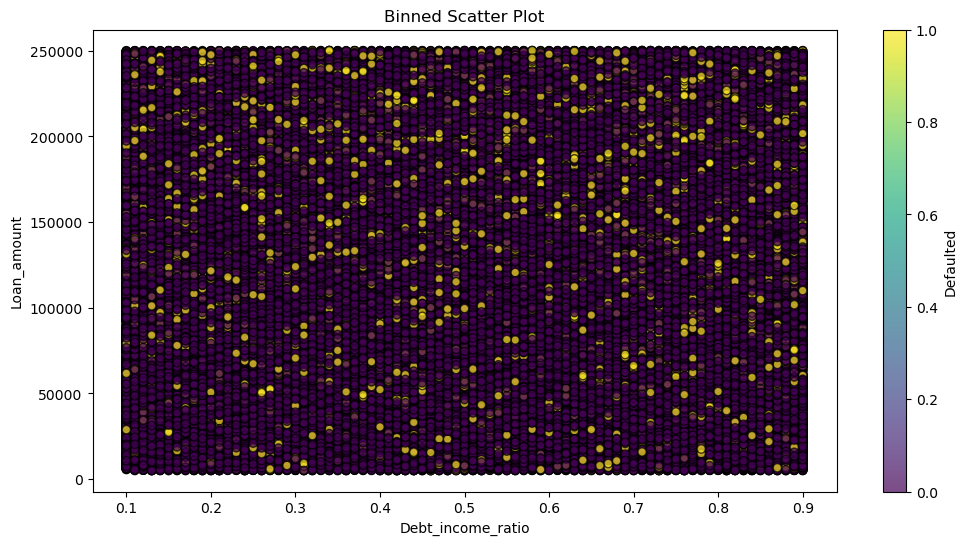

In [25]:
# here is a function that shows binned scatter plot

def create_binned_scatter_plot(data, x_column, y_column, hue_column, x_bins, y_bins, figsize=(12, 6), title=None):
    """
    Create a binned scatter plot.

    Parameters:
    - data: DataFrame
    - x_column: str, column for the x-axis
    - y_column: str, column for the y-axis
    - hue_column: str, column for coloring the points
    - x_bins: list, bins for the x-axis
    - y_bins: list, bins for the y-axis
    - figsize: tuple, size of the figure
    - title: str, title of the plot

   
    """
    # Create a copy of the DataFrame to avoid modifying the original
    data_copy = data.copy()

    # Bin the data for x and y columns in the copy
    data_copy['x_bin'] = pd.cut(data_copy[x_column], bins=x_bins)
    data_copy['y_bin'] = pd.cut(data_copy[y_column], bins=y_bins)

    # Create a scatter plot with binned data
    plt.figure(figsize=figsize)
    plt.scatter(data_copy[x_column], data_copy[y_column], c=data_copy[hue_column], cmap='viridis', edgecolor='black', alpha=0.7)
    plt.xlabel(x_column.capitalize())
    plt.ylabel(y_column.capitalize())
    plt.title(title)

    # Add a colorbar
    cbar = plt.colorbar()
    cbar.set_label(hue_column.capitalize())

    # Show the plot
    plt.show()


# Define bins
debt_bins = [0, 0.2, 0.5, 0.7, 1.0]
loan_bins = [0, 50000, 100000, 200000, 250000]

# Create binned scatter plot without modifying 'new_df'
create_binned_scatter_plot(new_df, 'debt_income_ratio', 'loan_amount', 'defaulted', debt_bins, loan_bins, title='Binned Scatter Plot')


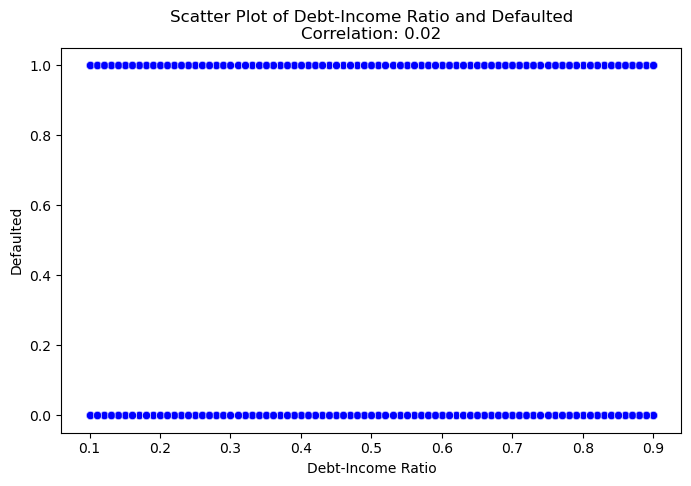

Pearson Correlation Coefficient: 0.02


In [32]:
# Calculate the Pearson correlation coefficient
correlation = new_df['debt_income_ratio'].corr(new_df['defaulted'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(x='debt_income_ratio', y='defaulted', data=new_df, color='blue', alpha=0.7)
plt.xlabel('Debt-Income Ratio')
plt.ylabel('Defaulted')
plt.title(f'Scatter Plot of Debt-Income Ratio and Defaulted\nCorrelation: {correlation:.2f}')
plt.show()

print(f"Pearson Correlation Coefficient: {correlation:.2f}")

In [ ]:
#

In [26]:
default_percentage = (new_df['defaulted'].mean()) * 100
print(f'Percentage of times a customer defaulted: {default_percentage}')

Percentage of times a customer defaulted: 11.612824901017047


### so we have 29,653 of our loans are defaulted out of 255347  loans

In [27]:
rejected_sum = (new_df['defaulted'] == 1 ).sum()

print(f"Sum of 'defaulted' loan status: {rejected_sum}")

Sum of 'defaulted' loan status: 29653


In [28]:
def defaulted_overall(df):
    '''plots overall loan responses
    of the data frame and returns 
    a bargraph'''
    # create a figure
    fig = plt.figure(figsize=(12, 6)) 
    ax = fig.add_subplot(111)

    # proportion of observation of each class
    prop_response = new_df['defaulted'].value_counts(normalize=True)

    # create a bar plot showing the percentage of churn
    prop_response.plot(kind='bar', 
                    ax=ax)


    # set title and labels
    ax.set_title('Proportion of observations of the response variable',
                fontsize=18)
    ax.set_xlabel('loan_status',
                fontsize=14)
    ax.set_ylabel('proportion of observations',
                fontsize=14)
    ax.tick_params(rotation='auto')

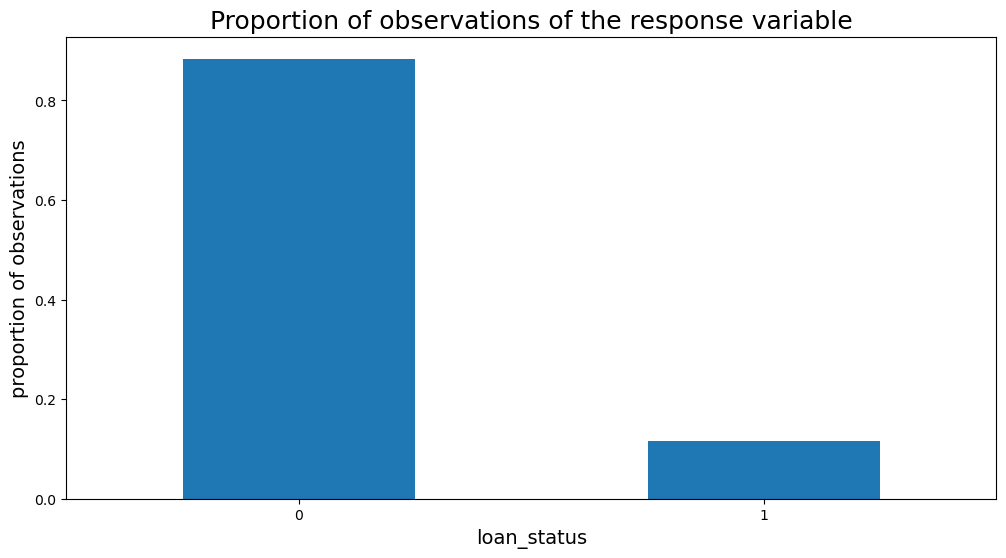

In [29]:
defaulted_overall(new_df)

### shows that loans are around 89 percent are not defaulted and over 10 percent are defaulted

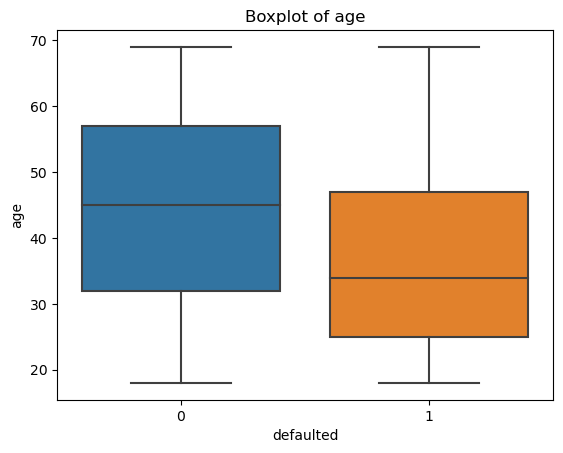

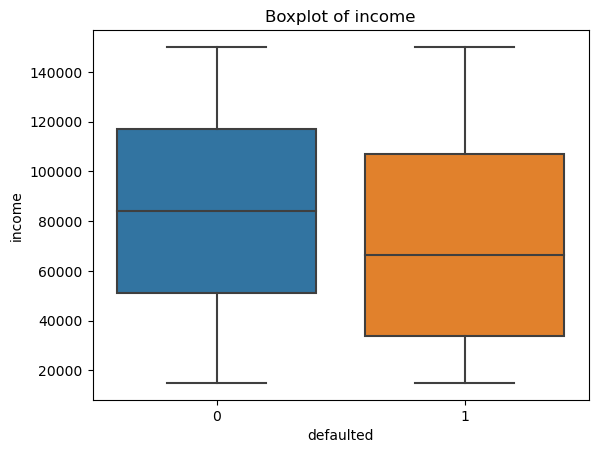

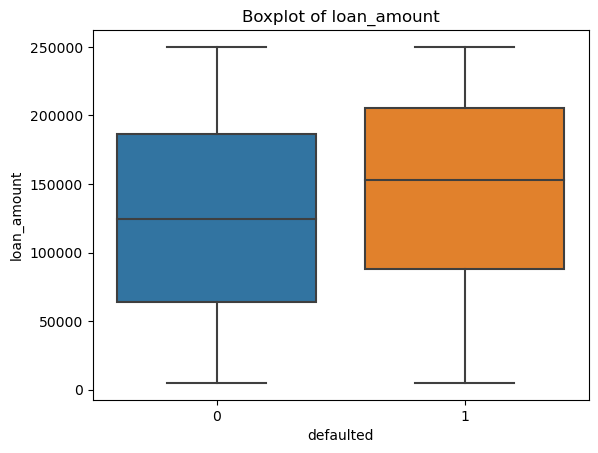

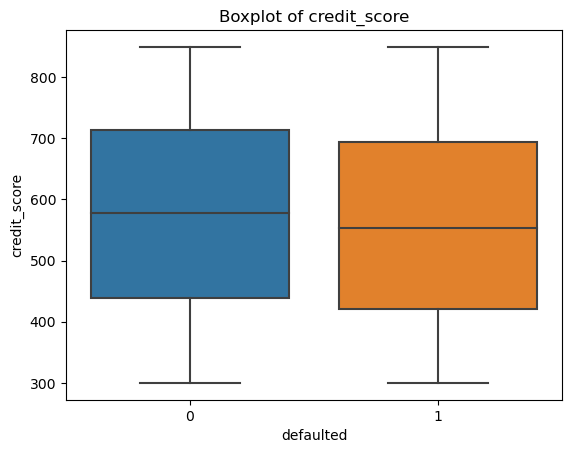

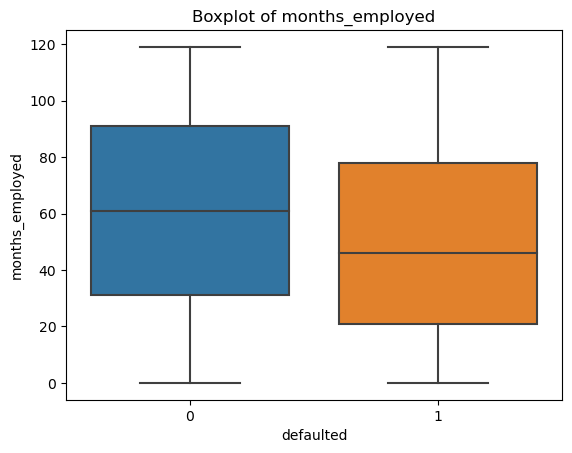

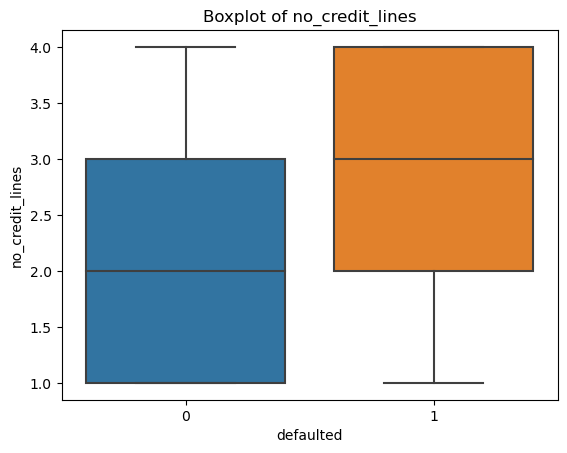

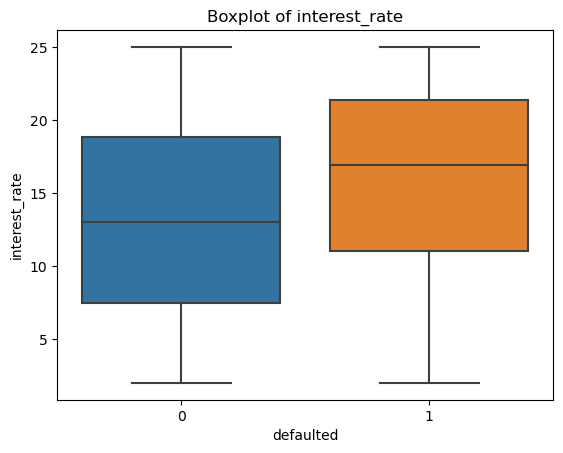

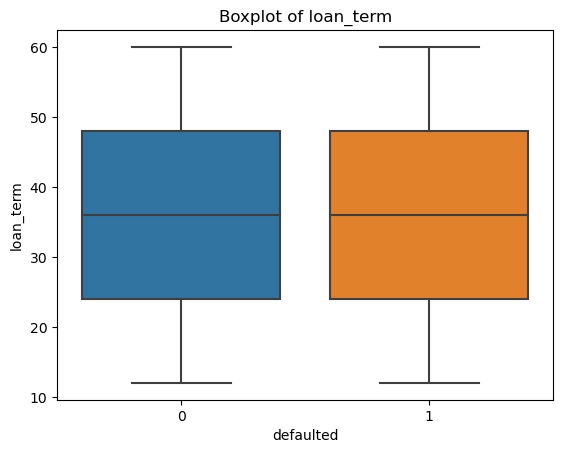

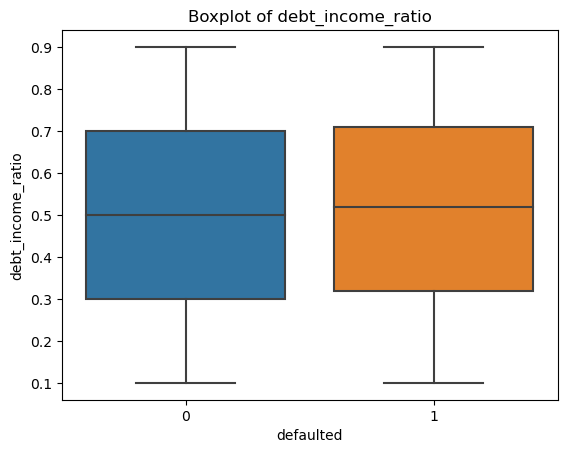

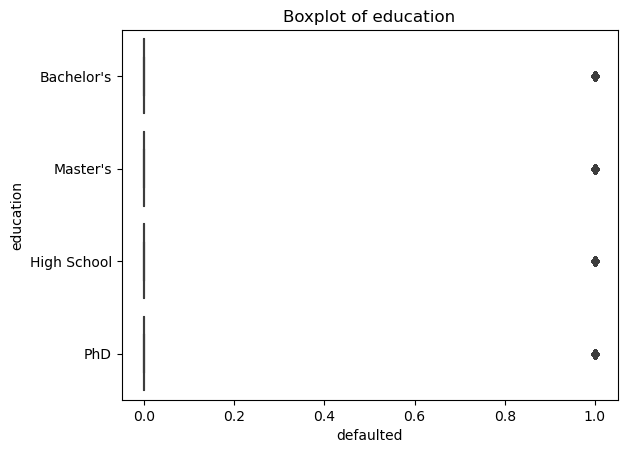

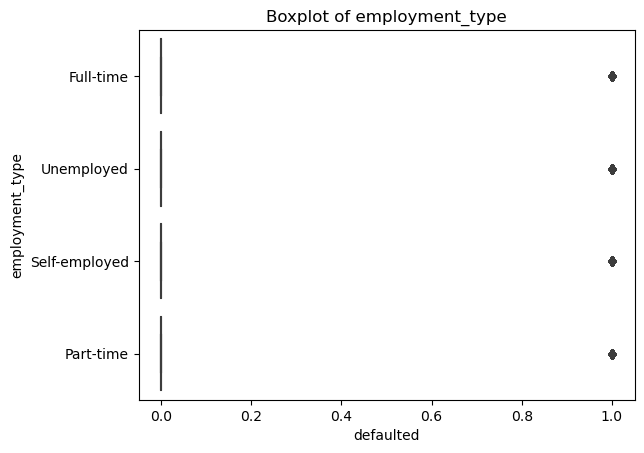

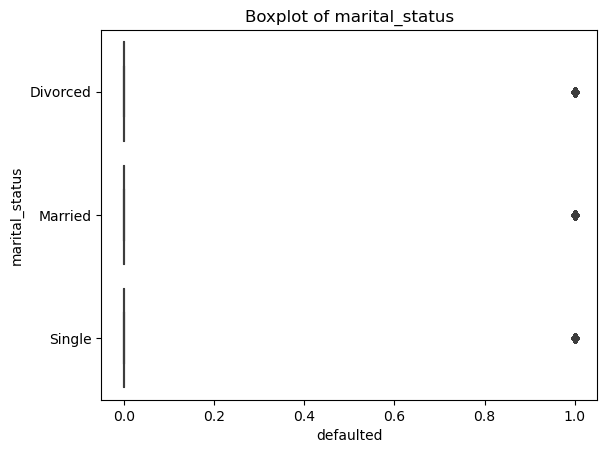

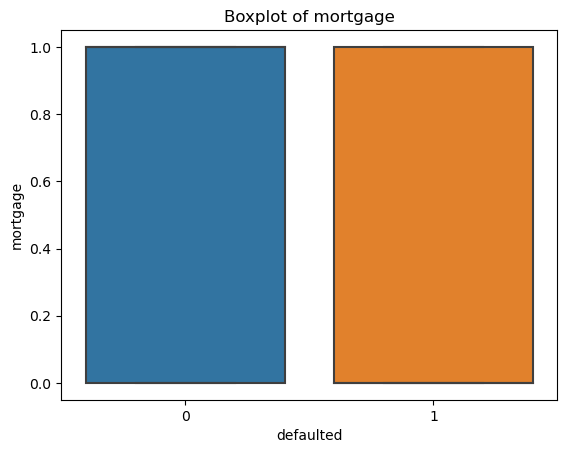

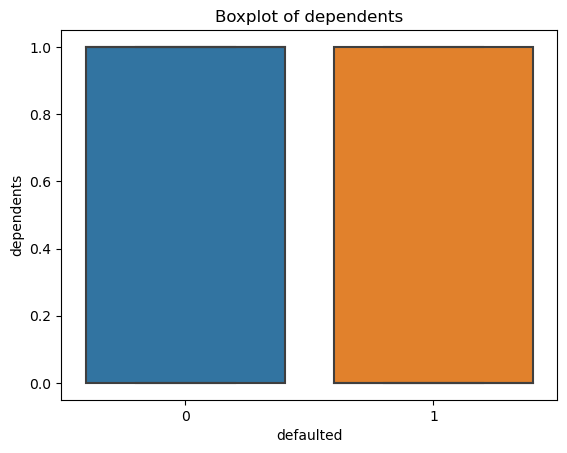

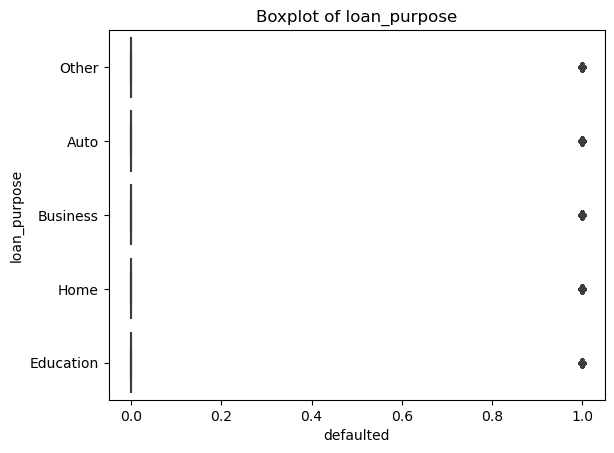

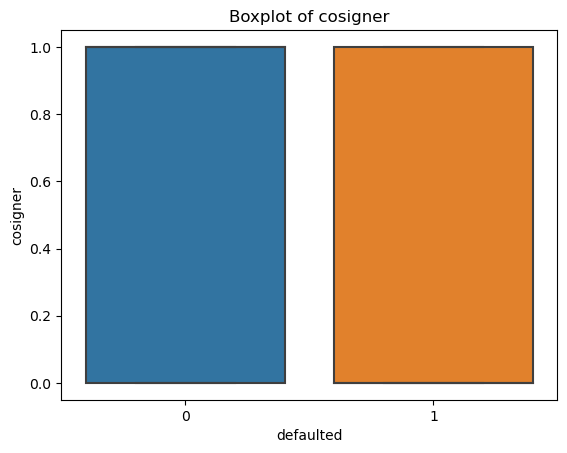

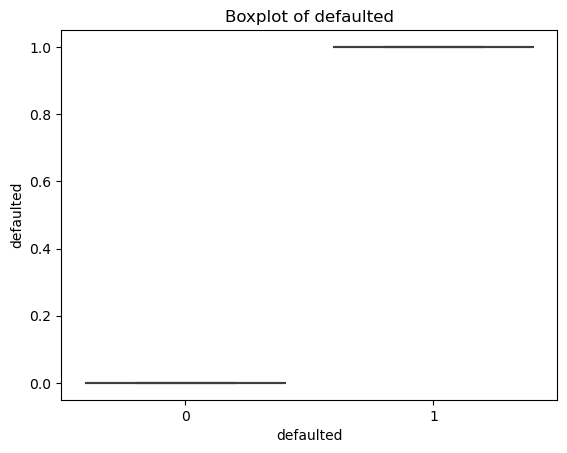

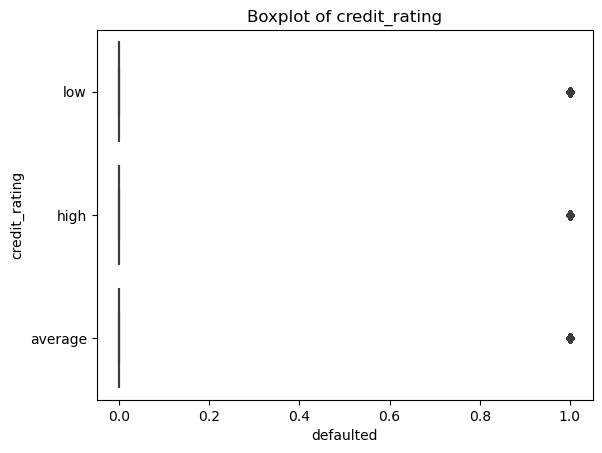

In [34]:
for col in df:
    sns.boxplot(data=df, x='defaulted', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

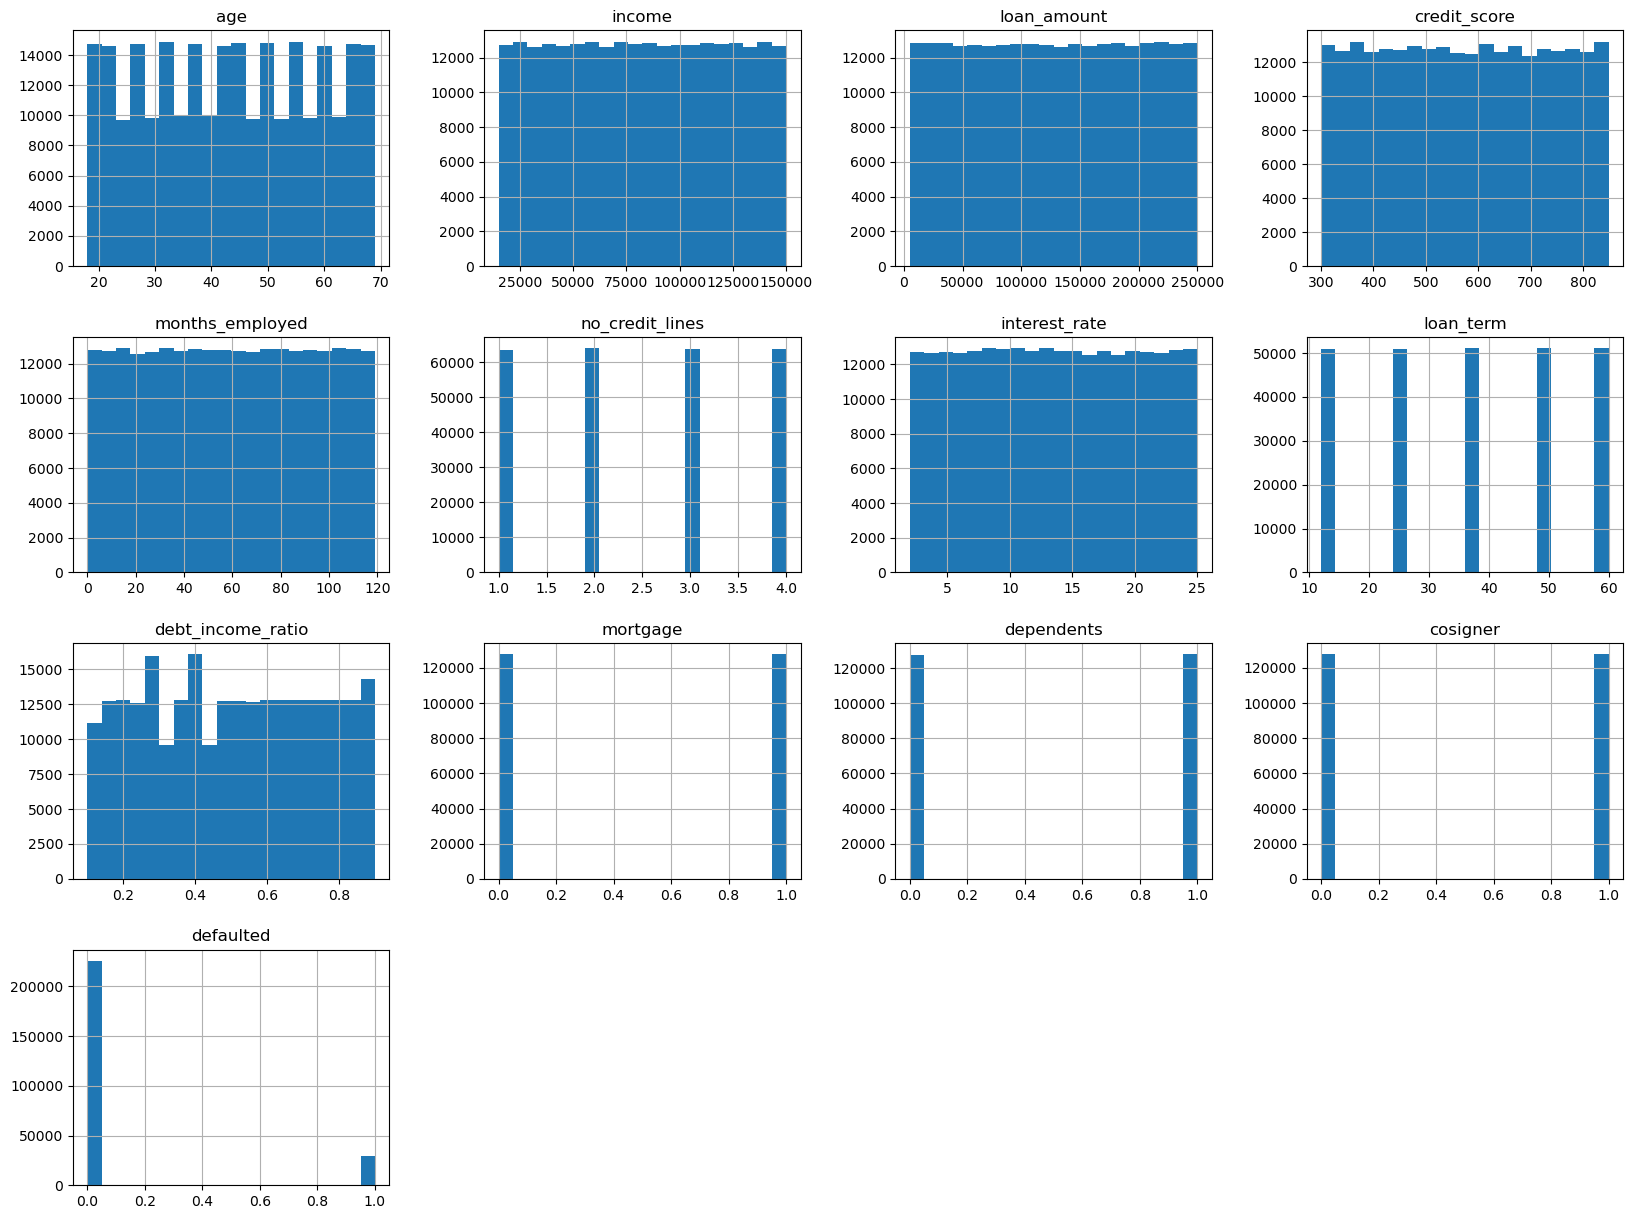

In [35]:
df.hist(bins=20, figsize=(20,15))
plt.show()

### Possible stats testing i could do: 

- Chi-Square Test: This test is used to determine if there is a significant association between two categorical variables1. For example, you might want to know if the loan default status is associated with the borrower’s employment status.

- T-Test: A t-test can help you compare the means of two groups and determine if they are significantly different from each other1. For instance, you might want to compare the average income of defaulters vs non-defaulters.

- ANOVA (Analysis of Variance): If you have more than two groups to compare, ANOVA can be used. It tests the hypothesis that the means of two or more populations are equal1.

- Kolmogorov-Smirnov Test: This is a non-parametric test that can be used to compare a sample with a reference probability distribution, or to compare two samples1. It can be useful when you’re not sure if your data follows a normal distribution.

- F-Test: The F-test is used in ANOVA to identify whether the means of several groups are equal. It’s also used in regression analysis to find out if the model is a good fit to the data1.

- Mann-Whitney U Test: This is a non-parametric test that can be used to compare two independent

### Possible Models I want to use

- Random Forest Classifier: This model is often used for predicting loan default as it can handle a large amount of data with high dimensionality12. It’s an ensemble learning method that operates by constructing multiple decision trees and outputs the class that is the mode of the classes output by individual trees12.

- Gradient Boosting (XGBoost): XGBoost is another popular model used in loan default prediction3. It’s an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It produces an ensemble of weak prediction models, typically decision trees3.

- Logistic Regression: Logistic regression is a statistical model used in binary classification problems like loan default prediction12. It’s a simple and efficient model to start with, especially when the relationship between the target and the features is not very complex and you don’t have a lot of computational power12.

- AdaBoost: With a real-world dataset from a prestigious international bank, it was demonstrated that the AdaBoost model can achieve a 100% accuracy for predicting loan default, outperforming other models including XGBoost, random forest, k nearest neighbors, and multilayer perceptrons4.

- Decision Trees: Decision trees are also used in predicting loan default. They are simple to understand and interpret, and can handle both categorical and numerical data1.

